In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
from utils import *
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/yeast/yeast-train.arff'
test_path = '../datasets/yeast/yeast-test.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 917/917 [00:00<00:00, 9299.87it/s]

Train data shape:  (1500, 1, 618)
Train labels shape:  (1500, 14)
Test data shape:  (917, 1, 618)
Test labels shape:  (917, 14)


In [3]:
samples = [500, 500, 500]
labels = [7, 3, 3]
seeds = return_seed(samples, labels, train_labels)
seeds

  0%|          | 3/997 [00:00<00:01, 727.93it/s]


[3, 4, 5, 6]

## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (500, 1, 618)
Train Labels shape is  (500, 7)
Classes trained are: 0 to 7


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 1, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 100/100 [07:20<00:00,  4.41s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.21265  |
| zero_one_loss       | 0.778626 |
| one_error           | 0        |
| micro av. jaccard   | 0.461963 |
| macro av. jaccard   | 0.233206 |
| micro av. precision | 0.677848 |
| macro av. precision | 0.278123 |
| micro av. recall    | 0.591919 |
| macro av. recall    | 0.320742 |
| micro av. f1        | 0.631976 |
| macro av. f1        | 0.296829 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.21265  |
| zero_one_loss       | 0.778626 |
| one_error           | 0        |
| micro av. jaccard   | 0.461963 |
| macro av. jaccard   | 0.233206 |
| micro av. precision | 0.677848 |
| macro av. precision | 0.278123 |


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 4, class 0 neurons = 2
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 2, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 2
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 2, class 0 neurons = 1
Class 9, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [10:32<00:00,  6.33s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.145402   |
| zero_one_loss       | 0.363141   |
| one_error           | 0.00436205 |
| micro av. jaccard   | 0.275362   |
| macro av. jaccard   | 0.133333   |
| micro av. precision | 0.605578   |
| macro av. precision | 0.201859   |
| micro av. recall    | 0.335541   |
| macro av. recall    | 0.180308   |
| micro av. f1        | 0.431818   |
| macro av. f1        | 0.190476   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 10) (917, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.193784 |
| zero_one_loss       | 0.812432 |
| one_error           | 0        |
| micro av. jaccard   | 0.426589 |
| macro av. jaccard   | 0.201908 |
| micro av. precision | 0.66499  |
| macro

  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 6, class 0 neurons = 4
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 3, class 0 neurons = 3
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 2
Class 7, class 1 neurons = 4, class 0 neurons = 2
Class 8, class 1 neurons = 2, class 0 neurons = 1
Class 9, class 1 neurons = 2, class 0 neurons = 1
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 1, class 0 neurons = 2
Class 12, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [14:20<00:00,  8.61s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.227554  |
| zero_one_loss       | 0.534351  |
| one_error           | 0.0119956 |
| micro av. jaccard   | 0.572696  |
| macro av. jaccard   | 0.413668  |
| micro av. precision | 0.718322  |
| macro av. precision | 0.627179  |
| micro av. recall    | 0.738556  |
| macro av. recall    | 0.535084  |
| micro av. f1        | 0.728299  |
| macro av. f1        | 0.539014  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 13) (917, 13)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.203003 |
| zero_one_loss       | 0.844057 |
| one_error           | 0        |
| micro av. jaccard   | 0.471962 |
| macro av. jaccard   | 0.249569 |
| micro av. precision | 0.680831 |
| macro av. precisio

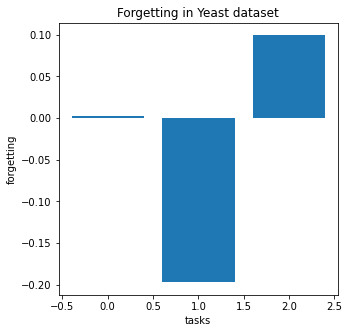

In [4]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': [500, 500, 500], 'labels': [7, 3, 3]},
    'seed': 5,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (500, 1, 618)
Train Labels shape is  (500, 7)
Classes trained are: 0 to 7


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 1, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [18:40<00:00, 11.20s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.22449  |
| zero_one_loss       | 0.74373  |
| one_error           | 0        |
| micro av. jaccard   | 0.26704  |
| macro av. jaccard   | 0.170124 |
| micro av. precision | 0.623515 |
| macro av. precision | 0.501668 |
| micro av. recall    | 0.318375 |
| macro av. recall    | 0.214995 |
| micro av. f1        | 0.421517 |
| macro av. f1        | 0.253803 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.22449  |
| zero_one_loss       | 0.74373  |
| one_error           | 0        |
| micro av. jaccard   | 0.26704  |
| macro av. jaccard   | 0.170124 |
| micro av. precision | 0.623515 |
| macro av. precision | 0.501668 |


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 4, class 0 neurons = 2
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 3, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 3, class 0 neurons = 2
Class 6, class 1 neurons = 2, class 0 neurons = 1
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 100/100 [29:25<00:00, 17.66s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.246092 |
| zero_one_loss       | 0.398037 |
| one_error           | 0.087241 |
| micro av. jaccard   | 0.691572 |
| macro av. jaccard   | 0.634098 |
| micro av. precision | 0.738327 |
| macro av. precision | 0.719085 |
| micro av. recall    | 0.916113 |
| macro av. recall    | 0.837995 |
| micro av. f1        | 0.817668 |
| macro av. f1        | 0.76327  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 10) (917, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.23108  |
| zero_one_loss       | 0.815703 |
| one_error           | 0        |
| micro av. jaccard   | 0.490135 |
| macro av. jaccard   | 0.309028 |
| micro av. precision | 0.705577 |
| macro av. precision | 0.461791 

  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 5, class 0 neurons = 3
Class 2, class 1 neurons = 5, class 0 neurons = 3
Class 3, class 1 neurons = 4, class 0 neurons = 3
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 3, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 1
Class 7, class 1 neurons = 4, class 0 neurons = 2
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 1, class 0 neurons = 2
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 3, class 0 neurons = 1
Class 12, class 1 neurons = 3, class 0 neurons = 1


100%|██████████| 100/100 [40:08<00:00, 24.08s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.161759   |
| zero_one_loss       | 0.410033   |
| one_error           | 0.00436205 |
| micro av. jaccard   | 0.274062   |
| macro av. jaccard   | 0.126984   |
| micro av. precision | 0.602151   |
| macro av. precision | 0.200717   |
| micro av. recall    | 0.334661   |
| macro av. recall    | 0.169697   |
| micro av. f1        | 0.430218   |
| macro av. f1        | 0.183908   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 13) (917, 13)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.216844 |
| zero_one_loss       | 0.864776 |
| one_error           | 0        |
| micro av. jaccard   | 0.459431 |
| macro av. jaccard   | 0.26519  |
| micro av. precision | 0.692841 |
| macro

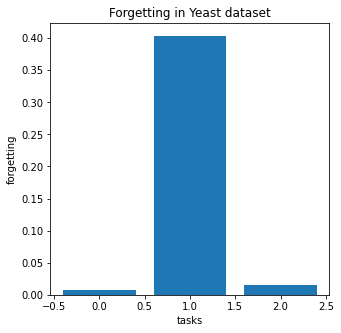

In [4]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': [500, 500, 500], 'labels': [7, 3, 3]},
    'seed': 3,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (500, 1, 618)
Train Labels shape is  (500, 7)
Classes trained are: 0 to 7


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 1, class 0 neurons = 2
Class 3, class 1 neurons = 2, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 1


100%|██████████| 100/100 [18:17<00:00, 10.97s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.192553 |
| zero_one_loss       | 0.736096 |
| one_error           | 0        |
| micro av. jaccard   | 0.504808 |
| macro av. jaccard   | 0.294102 |
| micro av. precision | 0.7      |
| macro av. precision | 0.485584 |
| micro av. recall    | 0.644172 |
| macro av. recall    | 0.385766 |
| micro av. f1        | 0.670927 |
| macro av. f1        | 0.390182 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.192553 |
| zero_one_loss       | 0.736096 |
| one_error           | 0        |
| micro av. jaccard   | 0.504808 |
| macro av. jaccard   | 0.294102 |
| micro av. precision | 0.7      |
| macro av. precision | 0.485584 |


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 4, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 2
Class 3, class 1 neurons = 2, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 2
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 2, class 0 neurons = 3
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [28:51<00:00, 17.31s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.193384  |
| zero_one_loss       | 0.436205  |
| one_error           | 0.0163577 |
| micro av. jaccard   | 0.612809  |
| macro av. jaccard   | 0.388857  |
| micro av. precision | 0.721508  |
| macro av. precision | 0.460273  |
| micro av. recall    | 0.802669  |
| macro av. recall    | 0.518648  |
| micro av. f1        | 0.759928  |
| macro av. f1        | 0.482345  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 10) (917, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.191603 |
| zero_one_loss       | 0.78626  |
| one_error           | 0        |
| micro av. jaccard   | 0.547398 |
| macro av. jaccard   | 0.327073 |
| micro av. precision | 0.707861 |
| macro av. precisio

  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 3
Class 1, class 1 neurons = 7, class 0 neurons = 3
Class 2, class 1 neurons = 1, class 0 neurons = 2
Class 3, class 1 neurons = 2, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 3
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 3, class 0 neurons = 4
Class 7, class 1 neurons = 4, class 0 neurons = 2
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 2, class 0 neurons = 1
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 2, class 0 neurons = 1
Class 12, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [39:31<00:00, 23.72s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.291894  |
| zero_one_loss       | 0.611778  |
| one_error           | 0.0250818 |
| micro av. jaccard   | 0.242453  |
| macro av. jaccard   | 0.215219  |
| micro av. precision | 0.5       |
| macro av. precision | 0.467942  |
| micro av. recall    | 0.32005   |
| macro av. recall    | 0.290503  |
| micro av. f1        | 0.390281  |
| macro av. f1        | 0.345417  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 13) (917, 13)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.219109 |
| zero_one_loss       | 0.858233 |
| one_error           | 0        |
| micro av. jaccard   | 0.478018 |
| macro av. jaccard   | 0.29948  |
| micro av. precision | 0.666667 |
| macro av. precisio

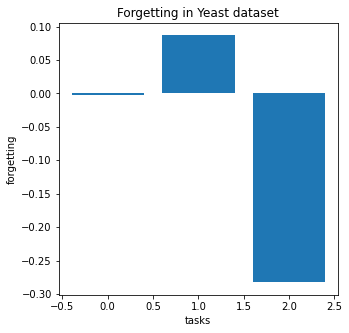

In [5]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': [500, 500, 500], 'labels': [7, 3, 3]},
    'seed': 4,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)